In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# csv 파일 불러오기
penguins = sns.load_dataset('penguins')
# 비어있는 데이터 지우기
penguins.dropna(inplace=True)
# 인덱스 번호 다시 정렬
penguins.reset_index(drop=True, inplace=True)

In [3]:
penguins.info()
penguins

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 팽귄의 코(bill)의 정보만 이용해 머신러닝 해보기

#### 시각화 해보기

In [4]:
# 팽귄의 종류 확인하기
print(pd.unique(penguins['species']))

['Adelie' 'Chinstrap' 'Gentoo']


In [5]:
# Adelie data 입력
Adelie_length = penguins[penguins['species'] == 'Adelie']['bill_length_mm']
Adelie_depth = penguins[penguins['species'] == 'Adelie']['bill_depth_mm']

# Chinstrap data 입력
Chinstrap_length = penguins[penguins['species'] == 'Chinstrap']['bill_length_mm']
Chinstrap_depth = penguins[penguins['species'] == 'Chinstrap']['bill_depth_mm']

# Gentoo data 입력
Gentoo_length = penguins[penguins['species'] == 'Gentoo']['bill_length_mm']
Gentoo_depth = penguins[penguins['species'] == 'Gentoo']['bill_depth_mm']

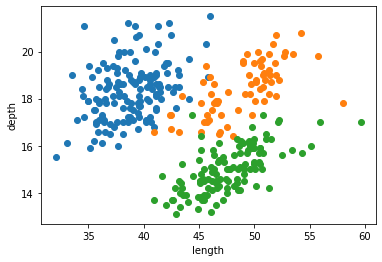

In [6]:
plt.scatter(Adelie_length, Adelie_depth)
plt.scatter(Chinstrap_length, Chinstrap_depth)
plt.scatter(Gentoo_length, Gentoo_depth)

plt.xlabel('length')
plt.ylabel("depth")
plt.show()

#### 데이터 합치기 

In [7]:
#리스트로 만들기
Adelie_length = list(Adelie_length)
Chinstrap_length = list(Chinstrap_length)
Gentoo_length = list(Gentoo_length)
Adelie_depth = list(Adelie_depth)
Chinstrap_depth = list(Chinstrap_depth)
Gentoo_depth = list(Gentoo_depth)

length = Adelie_length + Chinstrap_length + Gentoo_length
depth = Adelie_depth + Chinstrap_depth + Gentoo_depth

penguins_data = [[l, d]for l, d in zip(length, depth)]
print(penguins_data)

[[39.1, 18.7], [39.5, 17.4], [40.3, 18.0], [36.7, 19.3], [39.3, 20.6], [38.9, 17.8], [39.2, 19.6], [41.1, 17.6], [38.6, 21.2], [34.6, 21.1], [36.6, 17.8], [38.7, 19.0], [42.5, 20.7], [34.4, 18.4], [46.0, 21.5], [37.8, 18.3], [37.7, 18.7], [35.9, 19.2], [38.2, 18.1], [38.8, 17.2], [35.3, 18.9], [40.6, 18.6], [40.5, 17.9], [37.9, 18.6], [40.5, 18.9], [39.5, 16.7], [37.2, 18.1], [39.5, 17.8], [40.9, 18.9], [36.4, 17.0], [39.2, 21.1], [38.8, 20.0], [42.2, 18.5], [37.6, 19.3], [39.8, 19.1], [36.5, 18.0], [40.8, 18.4], [36.0, 18.5], [44.1, 19.7], [37.0, 16.9], [39.6, 18.8], [41.1, 19.0], [36.0, 17.9], [42.3, 21.2], [39.6, 17.7], [40.1, 18.9], [35.0, 17.9], [42.0, 19.5], [34.5, 18.1], [41.4, 18.6], [39.0, 17.5], [40.6, 18.8], [36.5, 16.6], [37.6, 19.1], [35.7, 16.9], [41.3, 21.1], [37.6, 17.0], [41.1, 18.2], [36.4, 17.1], [41.6, 18.0], [35.5, 16.2], [41.1, 19.1], [35.9, 16.6], [41.8, 19.4], [33.5, 19.0], [39.7, 18.4], [39.6, 17.2], [45.8, 18.9], [35.5, 17.5], [42.8, 18.5], [40.9, 16.8], [37.2

In [8]:
penguins_taget = ['Adelie'] * 146 + ['Chinstrap'] * 68 + ['Gentoo'] * 119

### KNN 모델로 학습하기

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# 모델 인스턴스 생성
kn = KNeighborsClassifier()
# 학습
kn.fit(penguins_data, penguins_taget)
# 점수 확인
kn.score(penguins_data, penguins_taget)

0.972972972972973

### 다음 그래프에 표시된 마커가 어떤 팽귄인가?

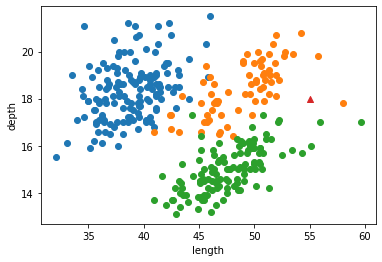

In [10]:
plt.scatter(Adelie_length, Adelie_depth)
plt.scatter(Chinstrap_length, Chinstrap_depth)
plt.scatter(Gentoo_length, Gentoo_depth)

plt.scatter(55, 18, marker='^')

plt.xlabel('length')
plt.ylabel("depth")
plt.show()

In [11]:
# 예측해보기
kn.predict([[55, 18]])

array(['Gentoo'], dtype='<U9')

### 비지도 학습

In [12]:
# 데이터 가져오기
Adelie_length = list(Adelie_length)
Chinstrap_length = list(Chinstrap_length)
Gentoo_length = list(Gentoo_length)
Adelie_depth = list(Adelie_depth)
Chinstrap_depth = list(Chinstrap_depth)
Gentoo_depth = list(Gentoo_depth)

length = Adelie_length + Chinstrap_length + Gentoo_length
depth = Adelie_depth + Chinstrap_depth + Gentoo_depth

# 2차원 데이터로 변환 
penguins_data = [[l,d] for l,d in zip(length, depth)]
penguins_taget = ['Adelie'] * 146 + ['Chinstrap'] * 68 + ['Gentoo'] * 119

# KNN 모델 사용
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 리스트 슬라이싱으로 훈련 데이터, 테스트 데이터 나누기
X_train_input = penguins_data[:222]
Y_train_target = penguins_taget[:222]

X_test_input = penguins_data[222:]
Y_test_target = penguins_taget[222:]

# 데이터 학습
kn.fit(X_train_input, Y_train_target)
kn.score(X_test_input, Y_test_target)

0.5675675675675675

In [13]:
# 팽귄 데이터로 numpy 배열 생성(input, target)
input_arr = np.array(penguins_data)
target_arr = np.array(penguins_taget)

In [14]:
# 데이터를 섞기 
index = np.arange(333)
np.random.seed()
np.random.shuffle(index)

In [15]:
# 넘파이의 배열 인덱싱으로 훈련데이터와 데스트 데이터 나누기
X_train_input = input_arr[index[:222]]
Y_train_target = target_arr[index[:222]]

X_test_input = input_arr[index[222:]]
Y_test_target = target_arr[index[222:]]

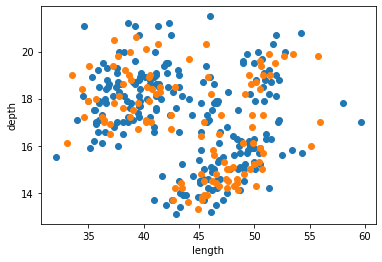

In [16]:
plt.scatter(X_train_input[:, 0], X_train_input[:, 1])
plt.scatter(X_test_input[:, 0], X_test_input[:, 1])
plt.xlabel('length')
plt.ylabel("depth")
plt.show()

In [17]:
# 모델 생성
kn = KNeighborsClassifier()
# 학습
kn.fit(X_train_input, Y_train_target)
# 점수 확인
kn.score(X_train_input, Y_train_target)

0.9684684684684685

In [18]:
# 테스트에 있는 데이터를 예측 해보기
y_hat = kn.predict(X_test_input)
y_hat

array(['Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo

In [19]:
# 예측한 값이 맞는지 정답과 비교하기
y_hat == Y_test_target

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True])

### 브로드캐스팅을 이용하여 점수 결과 확인해보기

In [20]:
# 다시 데이터 가져오기

length = Adelie_length + Chinstrap_length + Gentoo_length
depth = Adelie_depth + Chinstrap_depth + Gentoo_depth

# 다시 정답 데이터 가져오기
penguins_taget = ['Adelie'] * 146 + ['Chinstrap'] * 68 + ['Gentoo'] * 119

In [21]:
print(length)
print(depth)

[39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46.0, 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6, 40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2, 37.6, 39.8, 36.5, 40.8, 36.0, 44.1, 37.0, 39.6, 41.1, 36.0, 42.3, 39.6, 40.1, 35.0, 42.0, 34.5, 41.4, 39.0, 40.6, 36.5, 37.6, 35.7, 41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7, 39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7, 35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34.0, 39.6, 36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35.0, 41.0, 37.7, 37.8, 37.9, 39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7, 38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8, 41.5, 39.0, 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2, 37.0, 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39.0, 39.2, 36.6, 36.0, 37.8, 36.0, 41.5, 46.5, 50.0, 51.3, 45.4, 52.7, 45.2, 46.1, 51.3, 46.0, 51.3, 46.6, 51.7, 47.0, 52.0, 45.9, 50.5, 50.3, 58.0, 46.4, 49.2, 42.

In [22]:
# 타켓 데이터 확인
#penguins_taget

In [23]:
# 길이 데이터와 높이 데이터를 합침
penguins_data = np.column_stack((length, depth))
penguins_data[:3]

array([[39.1, 18.7],
       [39.5, 17.4],
       [40.3, 18. ]])

In [24]:
# stratify=fish_target 옵션을 추가하여 train_test_split함수로 데이터셋 분할하기
# 데이터셋 분할하기
X_train, X_test, y_train, y_test = \
    train_test_split(penguins_data, penguins_taget, random_state=42, stratify=penguins_taget)

In [25]:
# KNeighborsClassifier 객체 생성
model = KNeighborsClassifier()

# 학습하기
model.fit(X_train, y_train)

# 모델 정확도 평가 점수 확인
model.score(X_test, y_test)

0.9761904761904762

In [26]:
# 여전히 Gentoo 인 것을 확인 할 수 있음
kn.predict([[55, 18]])

array(['Gentoo'], dtype='<U9')

In [27]:
# [55, 18]의 이웃 개수 확인
distances, indexes = model.kneighbors([[55, 18]])
print(distances)
print(indexes)

[[1.3453624  1.96977156 2.00249844 2.40416306 2.42074369]]
[[ 96  33  30 200  11]]


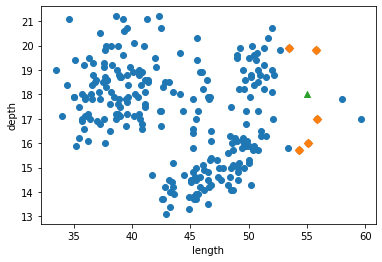

In [28]:
# 시각화 하여 확인
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(X_train[indexes,0], X_train[indexes,1], marker='D')
plt.scatter(55, 18, marker='^')
plt.xlabel('length')
plt.ylabel('depth')
plt.show()

In [29]:
kn.predict([[55, 18]])

array(['Gentoo'], dtype='<U9')

- #### 결과 값을 보면 Gentoo라고 뜨지만 위쪽에 해당하는 팽귄인지 아래쪽에 해당하는 팽귄인지는 정확하지 않다. 
- #### 따라서 브로드캐스팅으로 범위를 줄인다.

In [31]:
# 표준점수 구하기
mean = np.mean(X_train, axis=0) #평균. axis=0은 행을 축으로 함
std = np.std(X_train, axis=0) # 표준편차. axis=0은 행을 축으로 함

X_train_scaled = (X_train - mean) / std # 넘파이 배열 연산은 모든 행을 대상으로 계산됨
print(X_train_scaled)

[[ 1.26884494  0.7935353 ]
 [-0.75781873  0.94556682]
 [ 1.28694015 -0.37203963]
 [-0.92067563  0.7935353 ]
 [ 2.53550974  0.28676359]
 [ 0.36408437  0.84421247]
 [-1.4997224   0.38811793]
 [-1.15591338  1.04692116]
 [-0.97496127 -0.01729944]
 [-1.21019902  0.28676359]
 [-0.68543789 -0.06797661]
 [ 1.72122523  1.35098419]
 [ 1.08789283  1.1482755 ]
 [-1.11972296  0.54014945]
 [-0.92067563  0.28676359]
 [ 0.27360832 -1.68964609]
 [-0.10639112 -1.43626023]
 [ 0.50884606 -0.92948852]
 [-0.26924802 -0.27068529]
 [ 0.50884606 -0.57474832]
 [ 0.45456043 -1.89235477]
 [-0.26924802  1.75640156]
 [-0.41400972 -1.28422872]
 [ 0.21932268 -0.72677983]
 [-0.25115281 -1.79100043]
 [ 0.94313114 -1.03084286]
 [-1.37305592 -0.11865378]
 [ 1.48598748  0.7935353 ]
 [-1.31877028  0.7935353 ]
 [-0.61305704 -0.01729944]
 [ 2.01074861 -0.62542549]
 [-0.30543845  2.00978741]
 [-0.61305704  0.89488965]
 [ 2.13741509  1.30030702]
 [-0.46829535  0.64150379]
 [ 0.87075029 -0.52407115]
 [ 1.01551198 -0.62542549]
 

In [32]:
new = ([55, 18] - mean) / std
new

array([1.9926534 , 0.38811793])

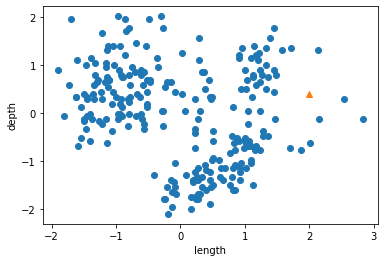

In [33]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('depth')
plt.show()

In [34]:
# KNeighborsClassifier 객체 생성
model = KNeighborsClassifier()

# 학습하기
model.fit(X_train_scaled, y_train)

# 모델 정확도 평가 점수 확인
# 테스트 데이터(test_input)도 훈련데이터로 만든 기준으로 스케일링
X_test_scaled = (X_test - mean) / std
model.score(X_test_scaled, y_test)

0.9523809523809523

In [35]:
print(model.predict([new]))

['Chinstrap']


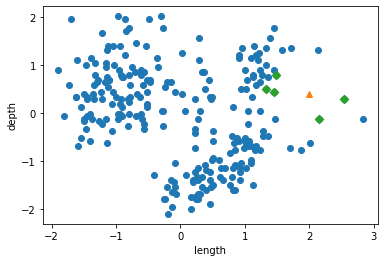

In [37]:
# 이웃 정보 확인하기
distances, indexes = model.kneighbors([new])
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(X_train_scaled[indexes,0], X_train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('depth')
plt.show()

### 표준화를 시켜 결과 값이 다른 것을 확인해 볼 수 있다. 